1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm, style
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize, fftpack
from scipy.integrate import odeint
style.use('fivethirtyeight')

In [3]:
def f(x):
    x, y= x
    return 4 - 2.1 * x**2 + (x**4) / 3 + x * y + (4 * y**2 - 4) * y**2

Text(0.5, 1.0, '2D Color plot of the six-hump camelback function')

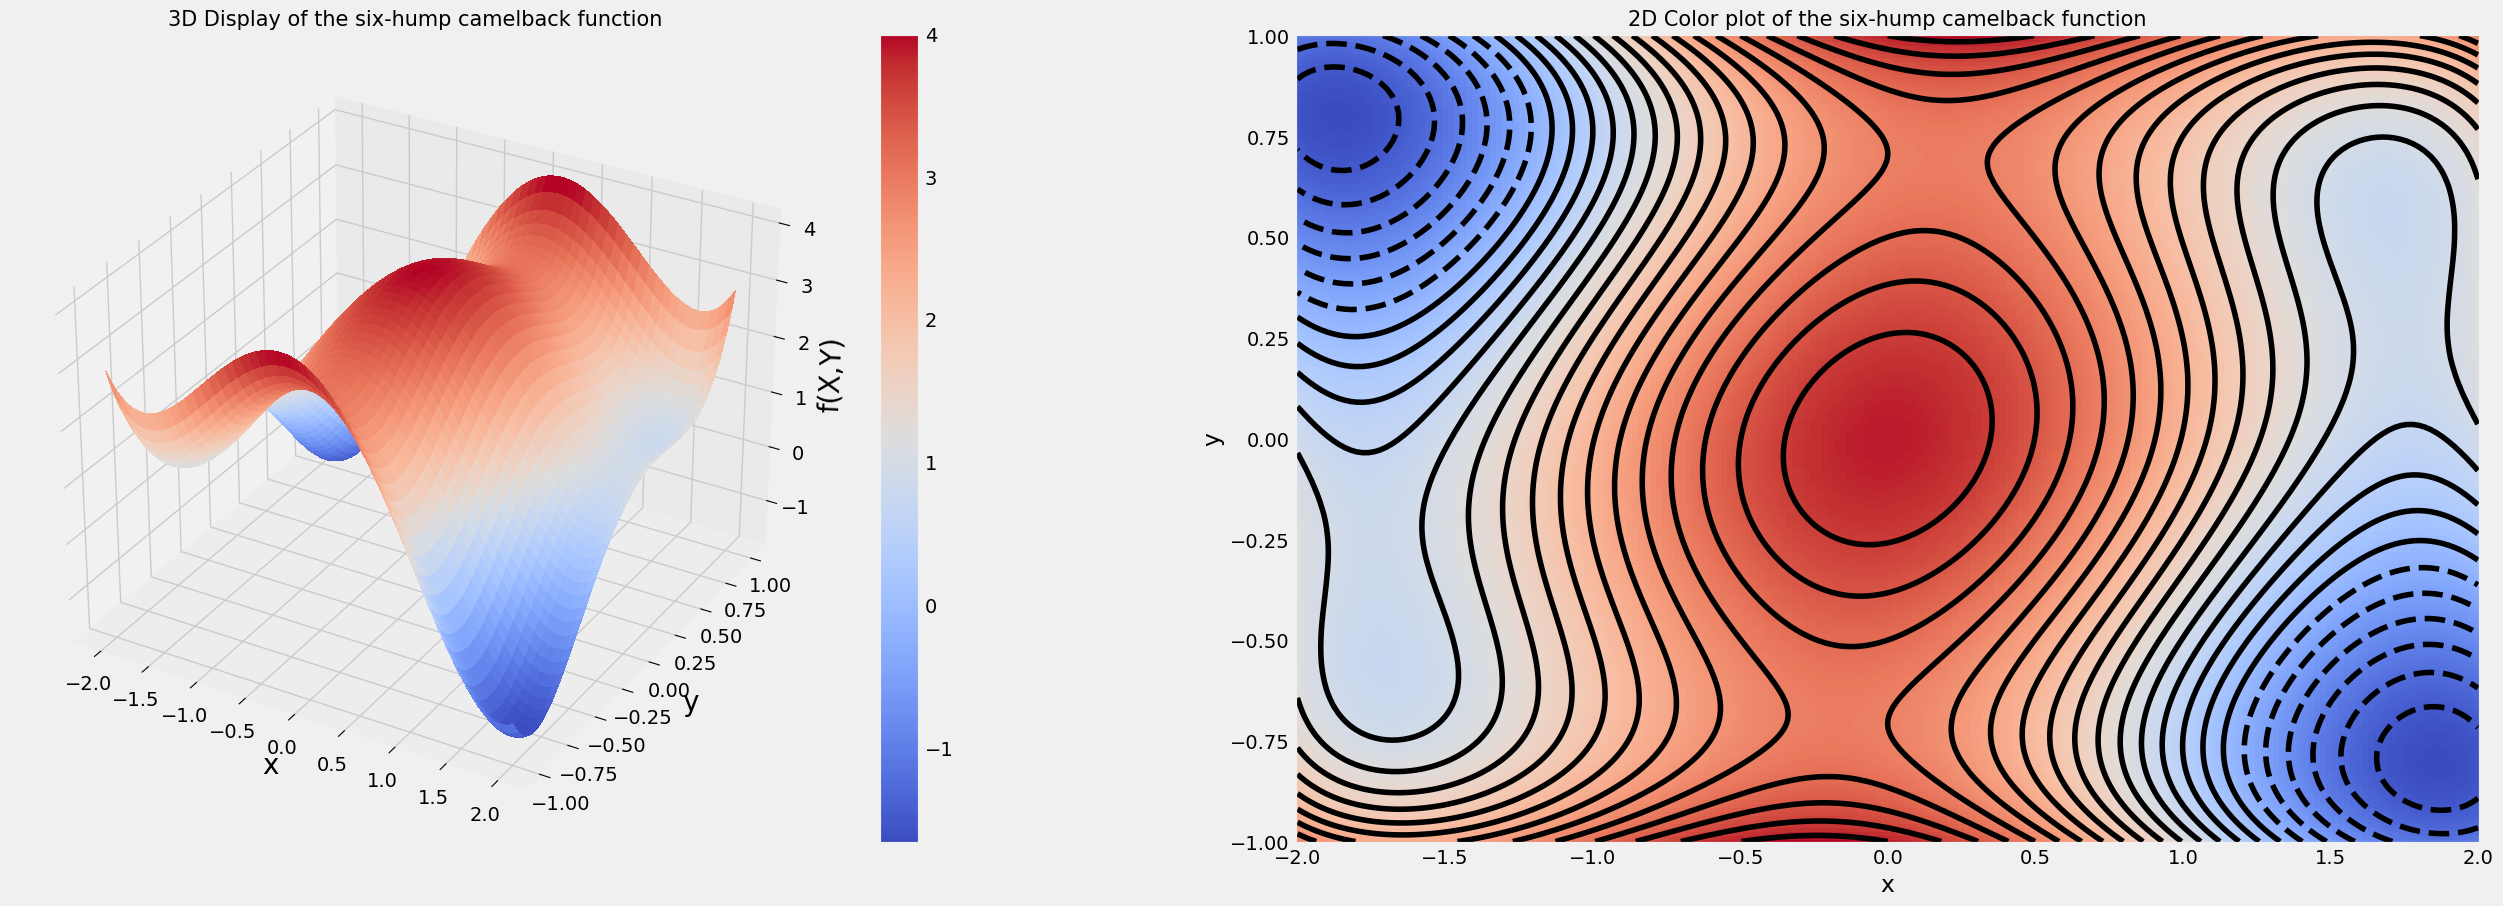

In [8]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(121, projection='3d')
X = np.linspace(-2,2,200)
Y = np.linspace(-1,1,200)
X, Y = np.meshgrid(X, Y)
Z = f((X,Y))
# Plot the surface.
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax1.set_xlabel('x', size=20)
ax1.set_ylabel('y', size=20)
ax1.set_zlabel('f(X,Y)', size=20)
ax1.set_title('3D Display of the six-hump camelback function', size=15)
# Add a color bar which maps values to colors.
fig.colorbar(surf)
ax2 = fig.add_subplot(122)
levels=np.arange(-10,10,0.25)
ax2.pcolor(X,Y,Z,cmap=cm.coolwarm)
contour=ax2.contour(X,Y,Z, colors='black', levels=levels)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title(r"2D Color plot of the six-hump camelback function", fontsize=15)

Minimum point (x,y): [ 1.86358017 -0.80317609]
Value of the function f(x,y) in the minimum : -1.6853149883258074 


Minimum point (x,y): [-1.86358008  0.80317608]
Value of the function f(x,y) in the minimum : -1.6853149882656653 


The found minimum : 4.0 in [0. 0.]


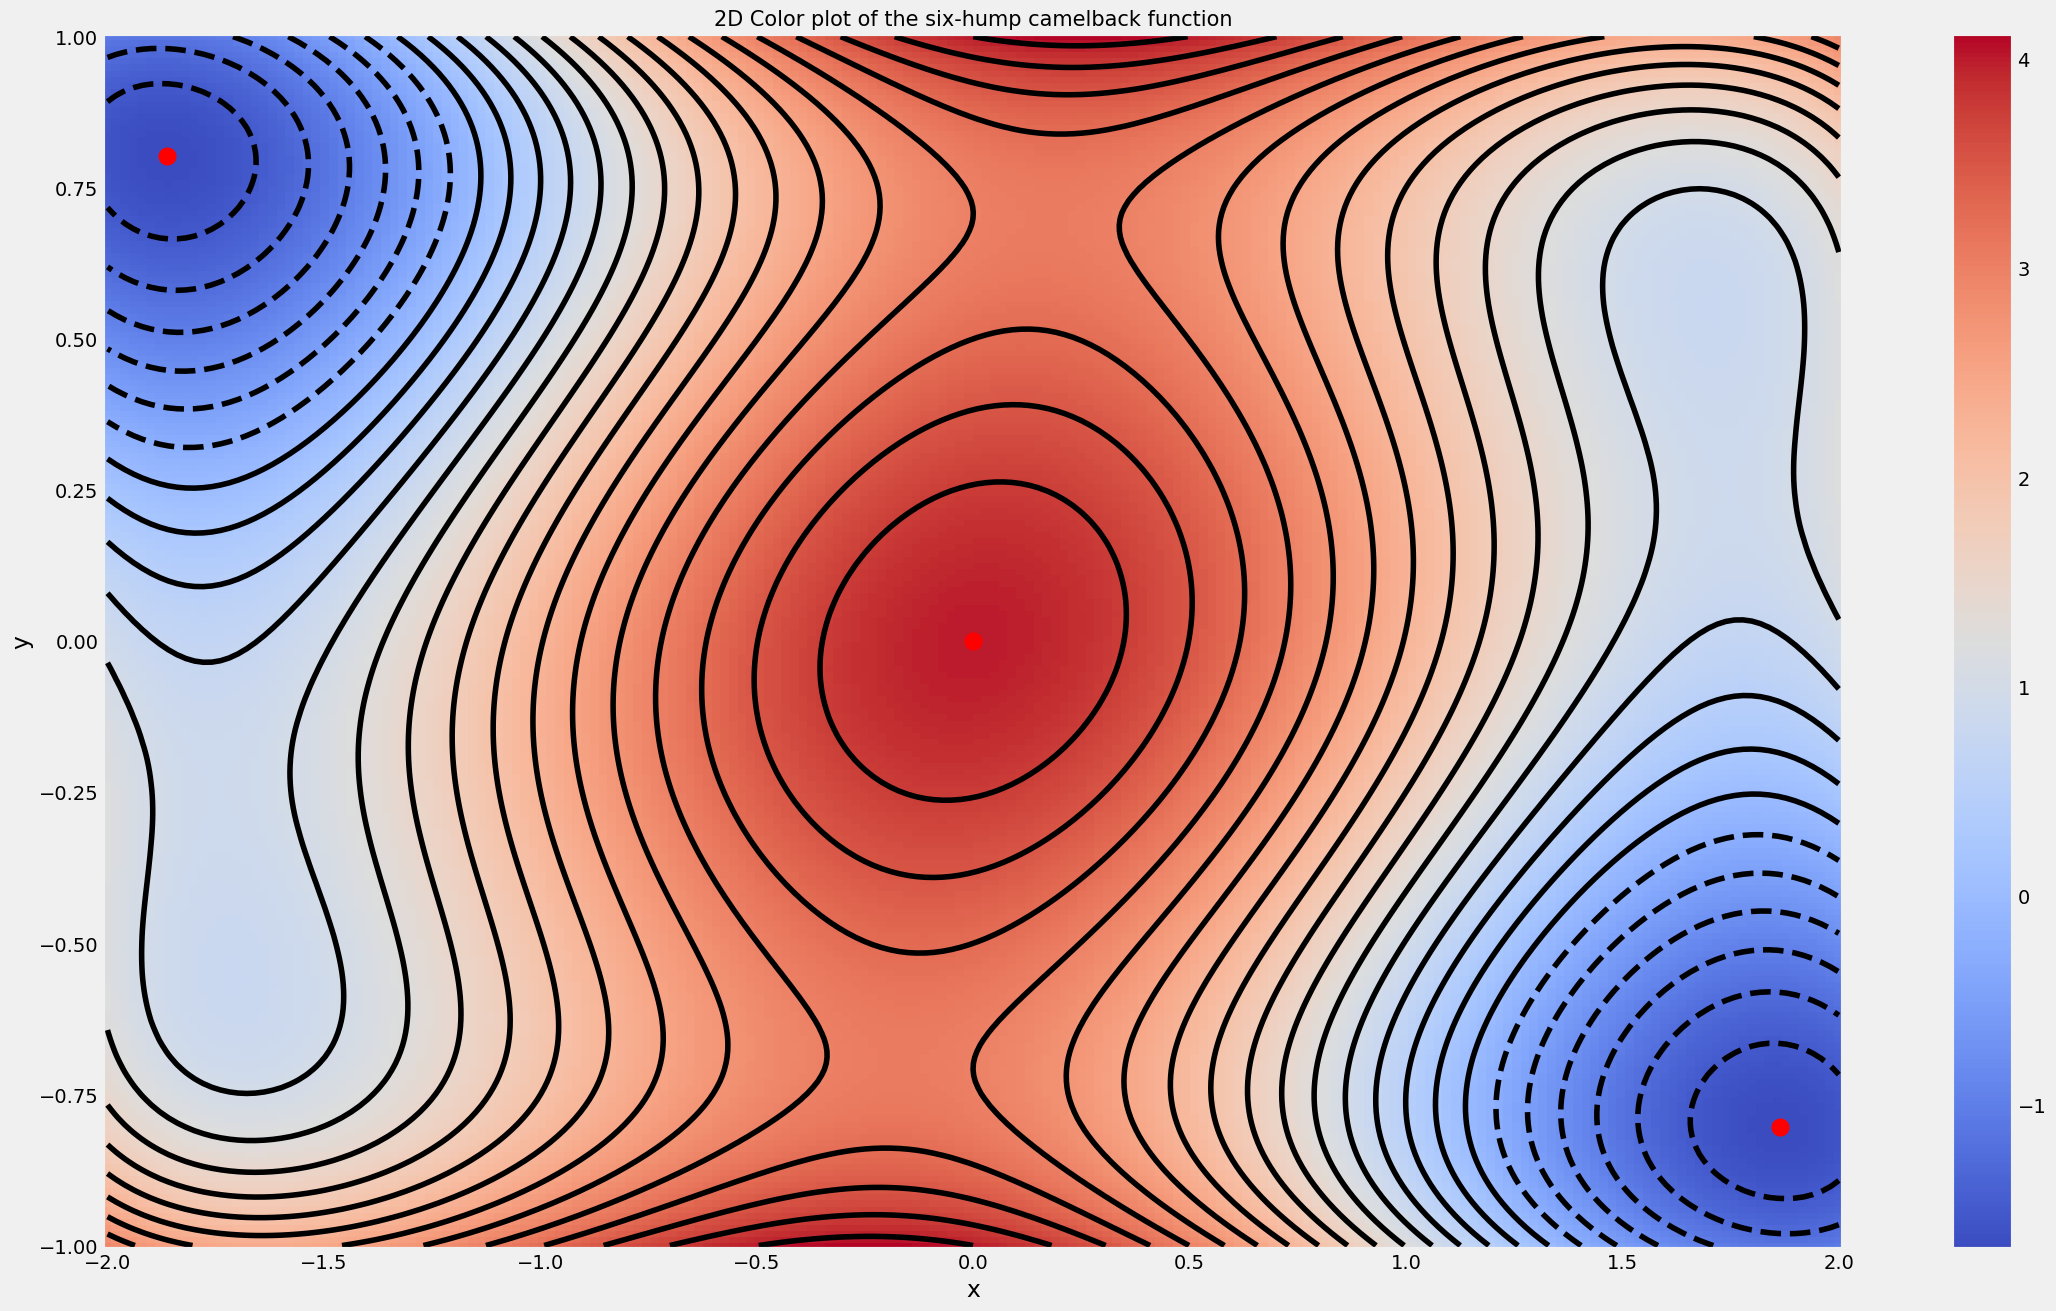

In [12]:
plt.figure(figsize=(25,15))
levels=np.arange(-10,10,0.25)
pcolor =plt.pcolor(X,Y,Z,cmap=cm.coolwarm)
contour=plt.contour(X,Y,Z, colors='black', levels=levels)
plt.colorbar(pcolor)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"2D Color plot of the six-hump camelback function", fontsize=15)

f_min = optimize.minimize(f,(0,-0.75), method='SLSQP')
print('Minimum point (x,y):',f_min.x)
print('Value of the function f(x,y) in the minimum :', f_min.fun,'\n\n')
plt.plot(f_min.x[0], f_min.x[1], 'ro', markersize=12 )

f_min = optimize.minimize(f,(0,0.75), method='SLSQP')
print('Minimum point (x,y):',f_min.x)
print('Value of the function f(x,y) in the minimum :', f_min.fun,'\n\n')
plt.plot(f_min.x[0], f_min.x[1], 'ro', markersize=12)

f_min = optimize.minimize(f,(0,0), method='SLSQP')
print('The found minimum :',f_min.fun,'in',f_min.x)
plt.plot(f_min.x[0], f_min.x[1], 'ro', markersize=12)

There are 2 global minimum for the six-hump camelback function for $-2 < x < 2$ and $-1 < y < 1$ :
* x = 0.09 & y = -0.71
* x = -0.09 & y = 0.71
In both cases, f(x,y) =  -1.03

(0,0) is not a good choice as starting point, because (0,0) is saddle point -> A saddle point (or minimax point), is a critical point that isn’t a local extremum (it’s not a local maximum or a local minimum). The derivate of f is equal to zero and the "estimated minimun" won't change.

----



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing.

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

In [13]:
# Define the function
def motion_eq(init_condition, t, Q, d, Ω):
  ω, θ = init_condition
  dθdt = ω
  dωdt =  + np.sin(θ) + d * np.cos(Ω*t) -(1/Q)*ω

  return np.array([dωdt, dθdt])

# Set times to get the solution at
t = np.arange(0, 200, 0.05)

# set initial condition
init_condition = [0, 0]
parameters = (2, 1.5, 0.65)

# Solve the problem, recover ω, θ arrays
ω,θ = odeint(motion_eq, init_condition, t, args=parameters).T

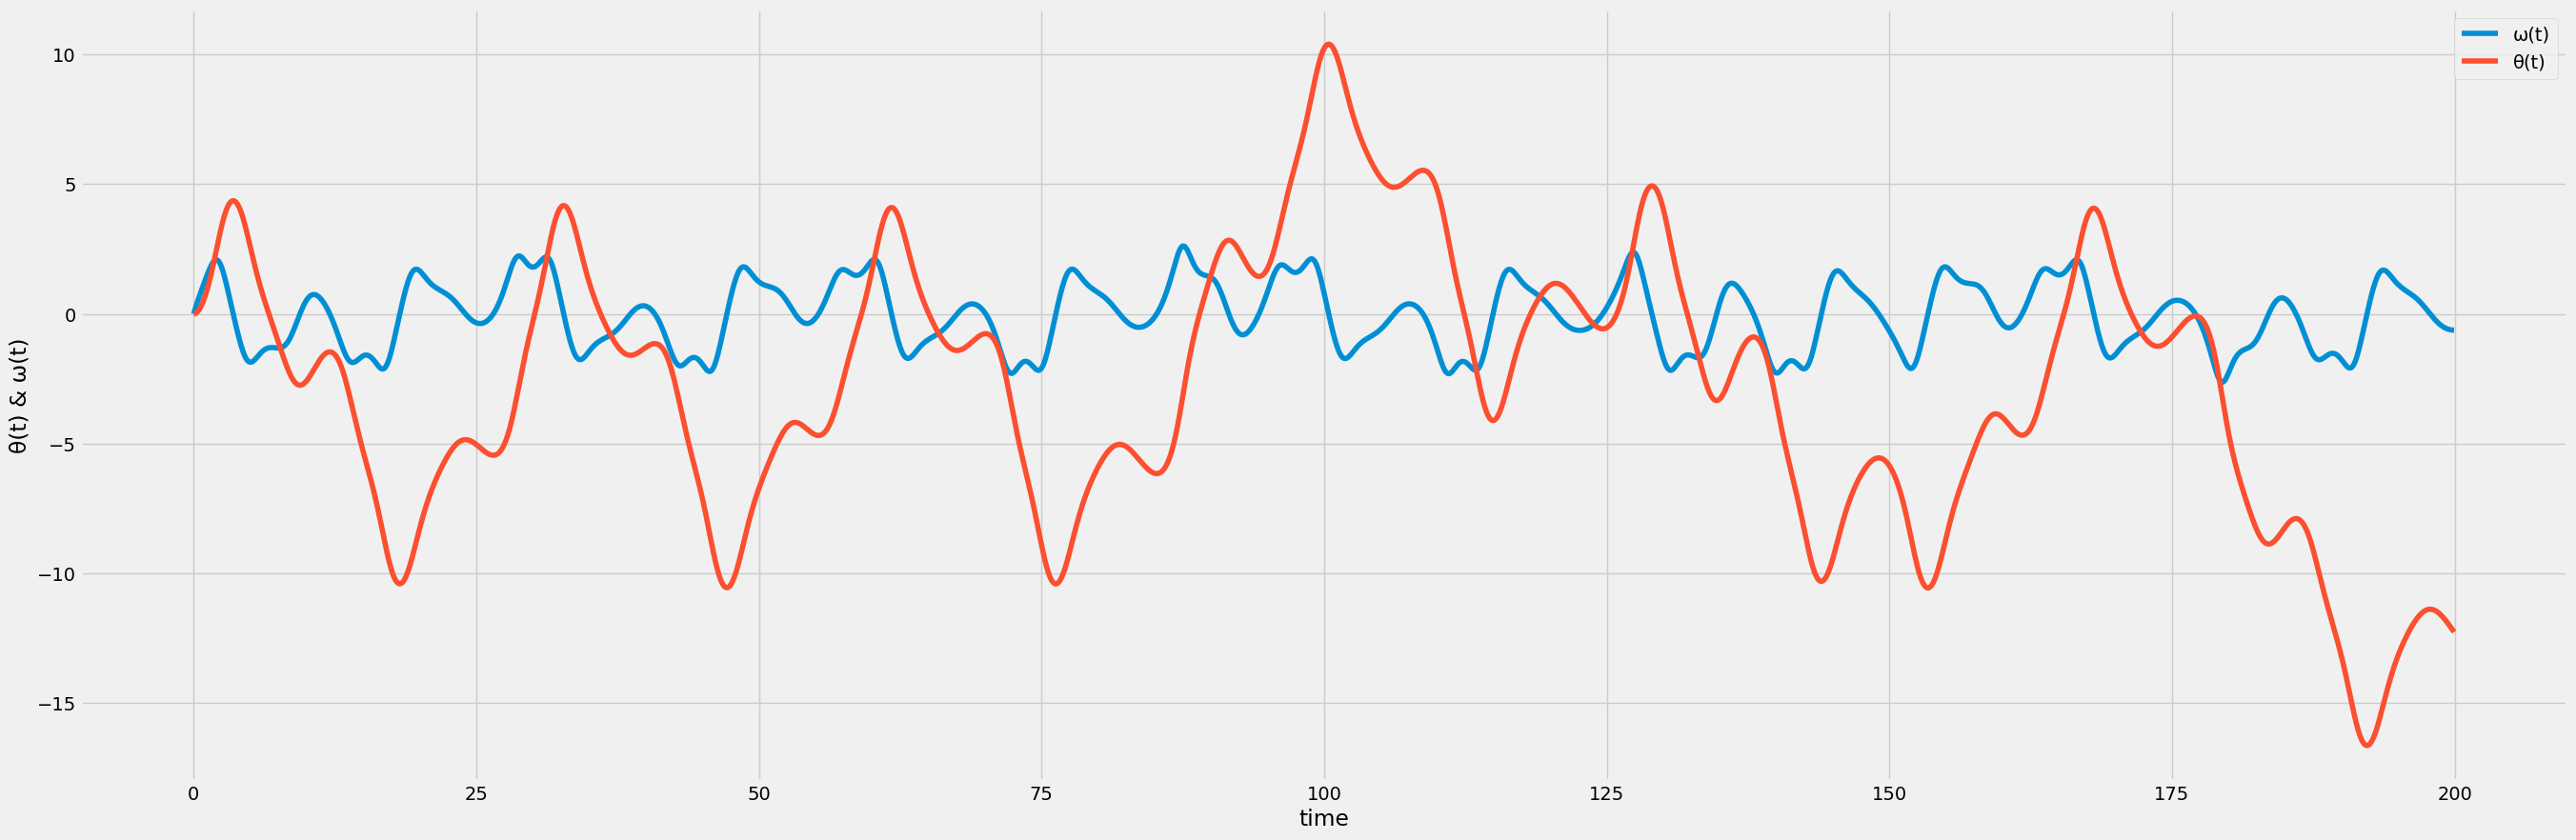

In [15]:
# plot
plt.figure(figsize=(30,10))
plt.plot(t, ω, label='ω(t)')
plt.plot(t, θ, label='θ(t)')
plt.xlabel('time')
plt.ylabel('θ(t) & ω(t)')
plt.legend()

----
determine if there is a set of parameters for which the motion is chaotic ?




In [18]:
# set initial condition
init_condition = [0, 0]
parameters = (0.5, 1.2, 1.2)
θ,ω = odeint(motion_eq, init_condition, t, args=parameters).T

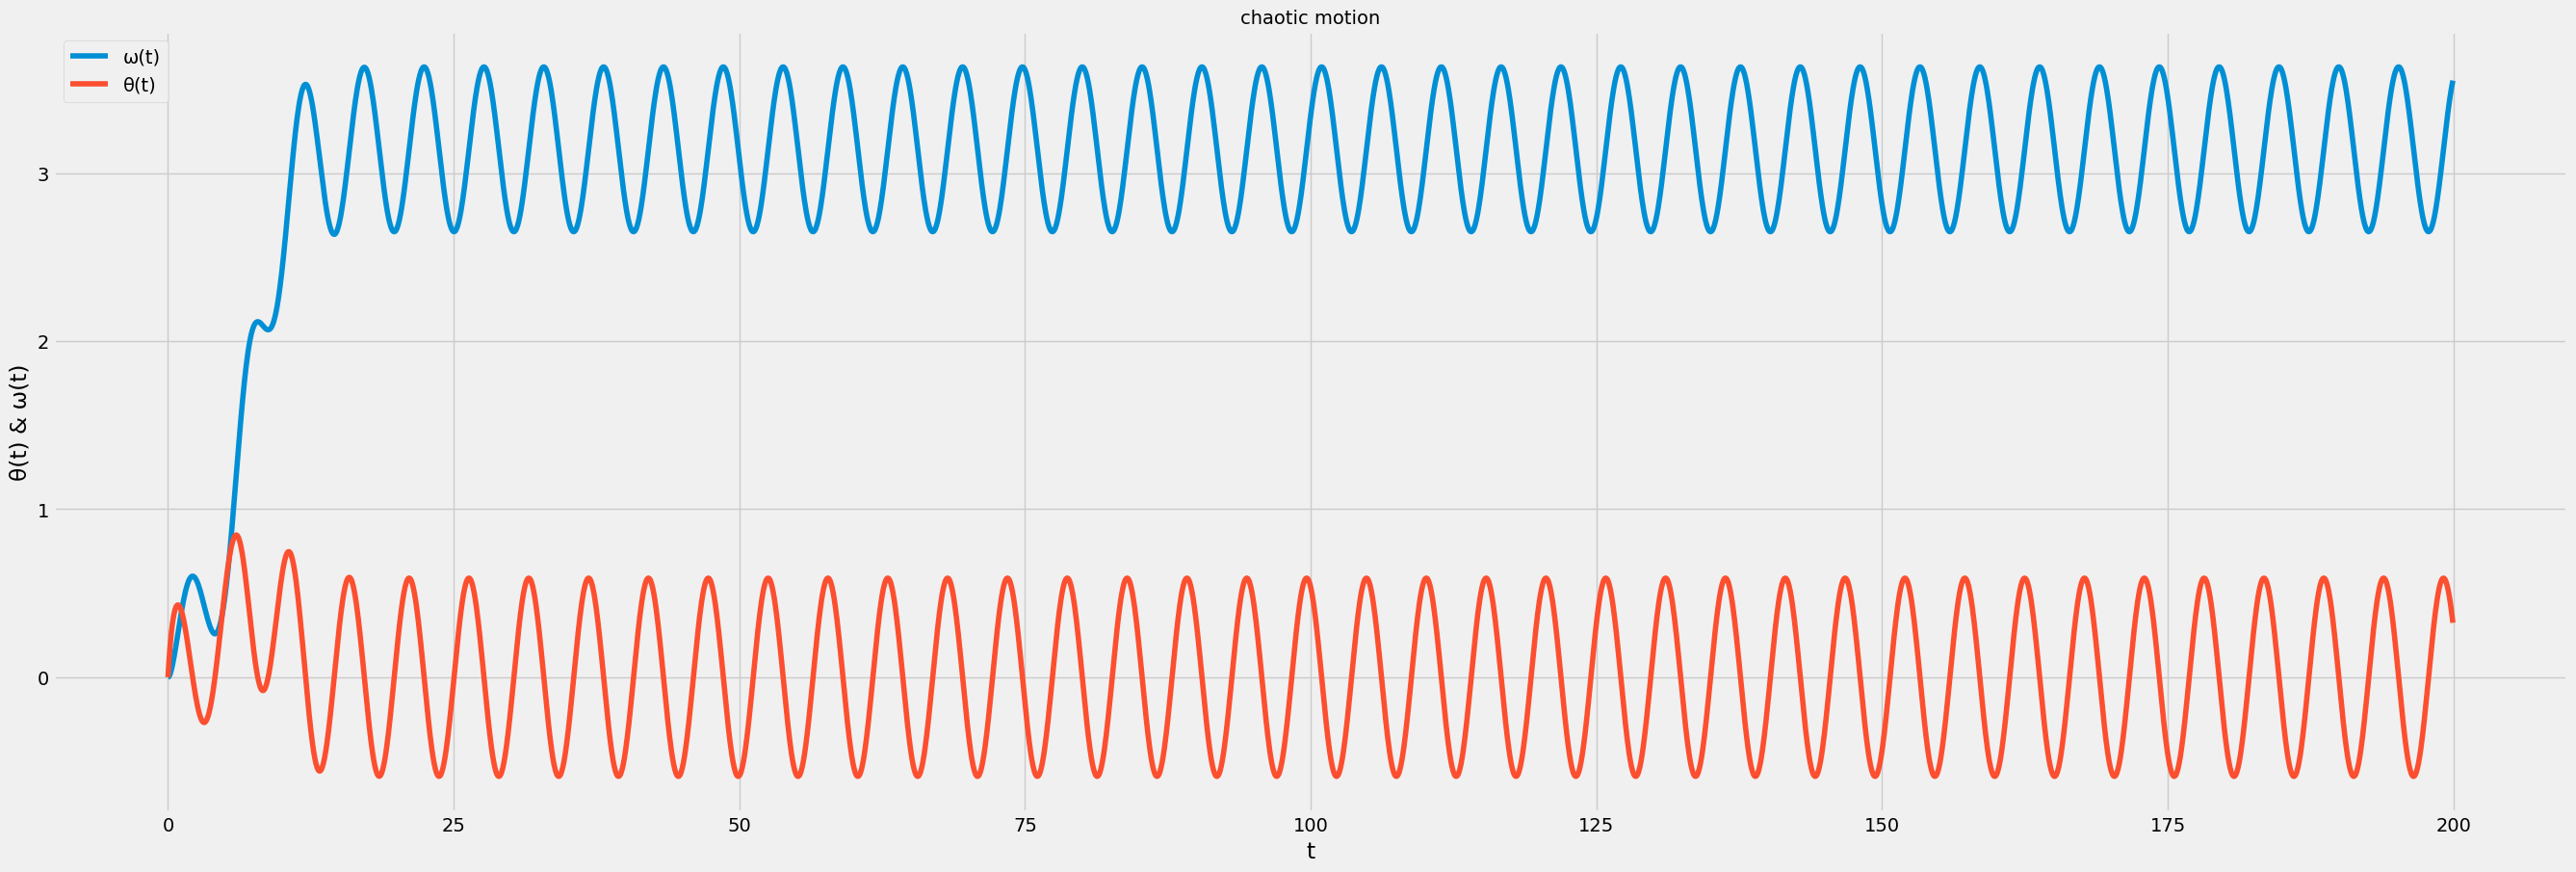

In [19]:
# plot the answer
plt.figure(figsize=(30,10))
plt.plot(t, ω, label='ω(t)')
plt.plot(t, θ, label='θ(t)')
plt.title("chaotic motion",fontsize=14)
plt.xlabel('t')
plt.ylabel('θ(t) & ω(t)')
plt.legend()

3. FFT of a simple dataset



In [21]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2024-01-15 14:26:50--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2024-01-15 14:26:51--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0212439b82585048182647ff27.dl.dropboxusercontent.com/cd/0/inline/CLZN0B4sqKsyamBvykkz9t1BJuCOLeGA1zhDZ_lvpI9QQKdPnVJyi9SDw80a0JKXuNC1JCywQV6gWhJ4JxT8Di2tQMsxx2LMZsKtBgWQRp5X8T9WgKMZwgn7zYxsPW6UMMI/file# [following]
--2024-01-15 14:26:51--  https://uc0212439b82585048182647ff27.dl.dropboxusercontent.com/cd/0/inline/CLZN0B4sqKsyamBvykkz9t1BJuCOLeGA1zhDZ_lvpI9QQKdPnVJyi9SDw80a0JKXuNC1JCywQV6gWhJ4JxT8Di2tQMsxx2LMZsKtBgWQRp5X8T9WgK

In [22]:
data = pd.read_csv("/content/data/populations.txt", sep="\t")
data.rename(columns = {'# year':'year'}, inplace = True)
plt.figure(figsize=(35,20))
plt.plot(data['year'], data['hare'], data['year'], data['lynx'], data['year'], data['carrot'], ls='--', marker='.',ms=25)
plt.title('Population of the three species')
plt.xlabel('Years')
plt.ylabel('Population')
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(0.9, 0.75))

Text(0, 0.5, 'Power')

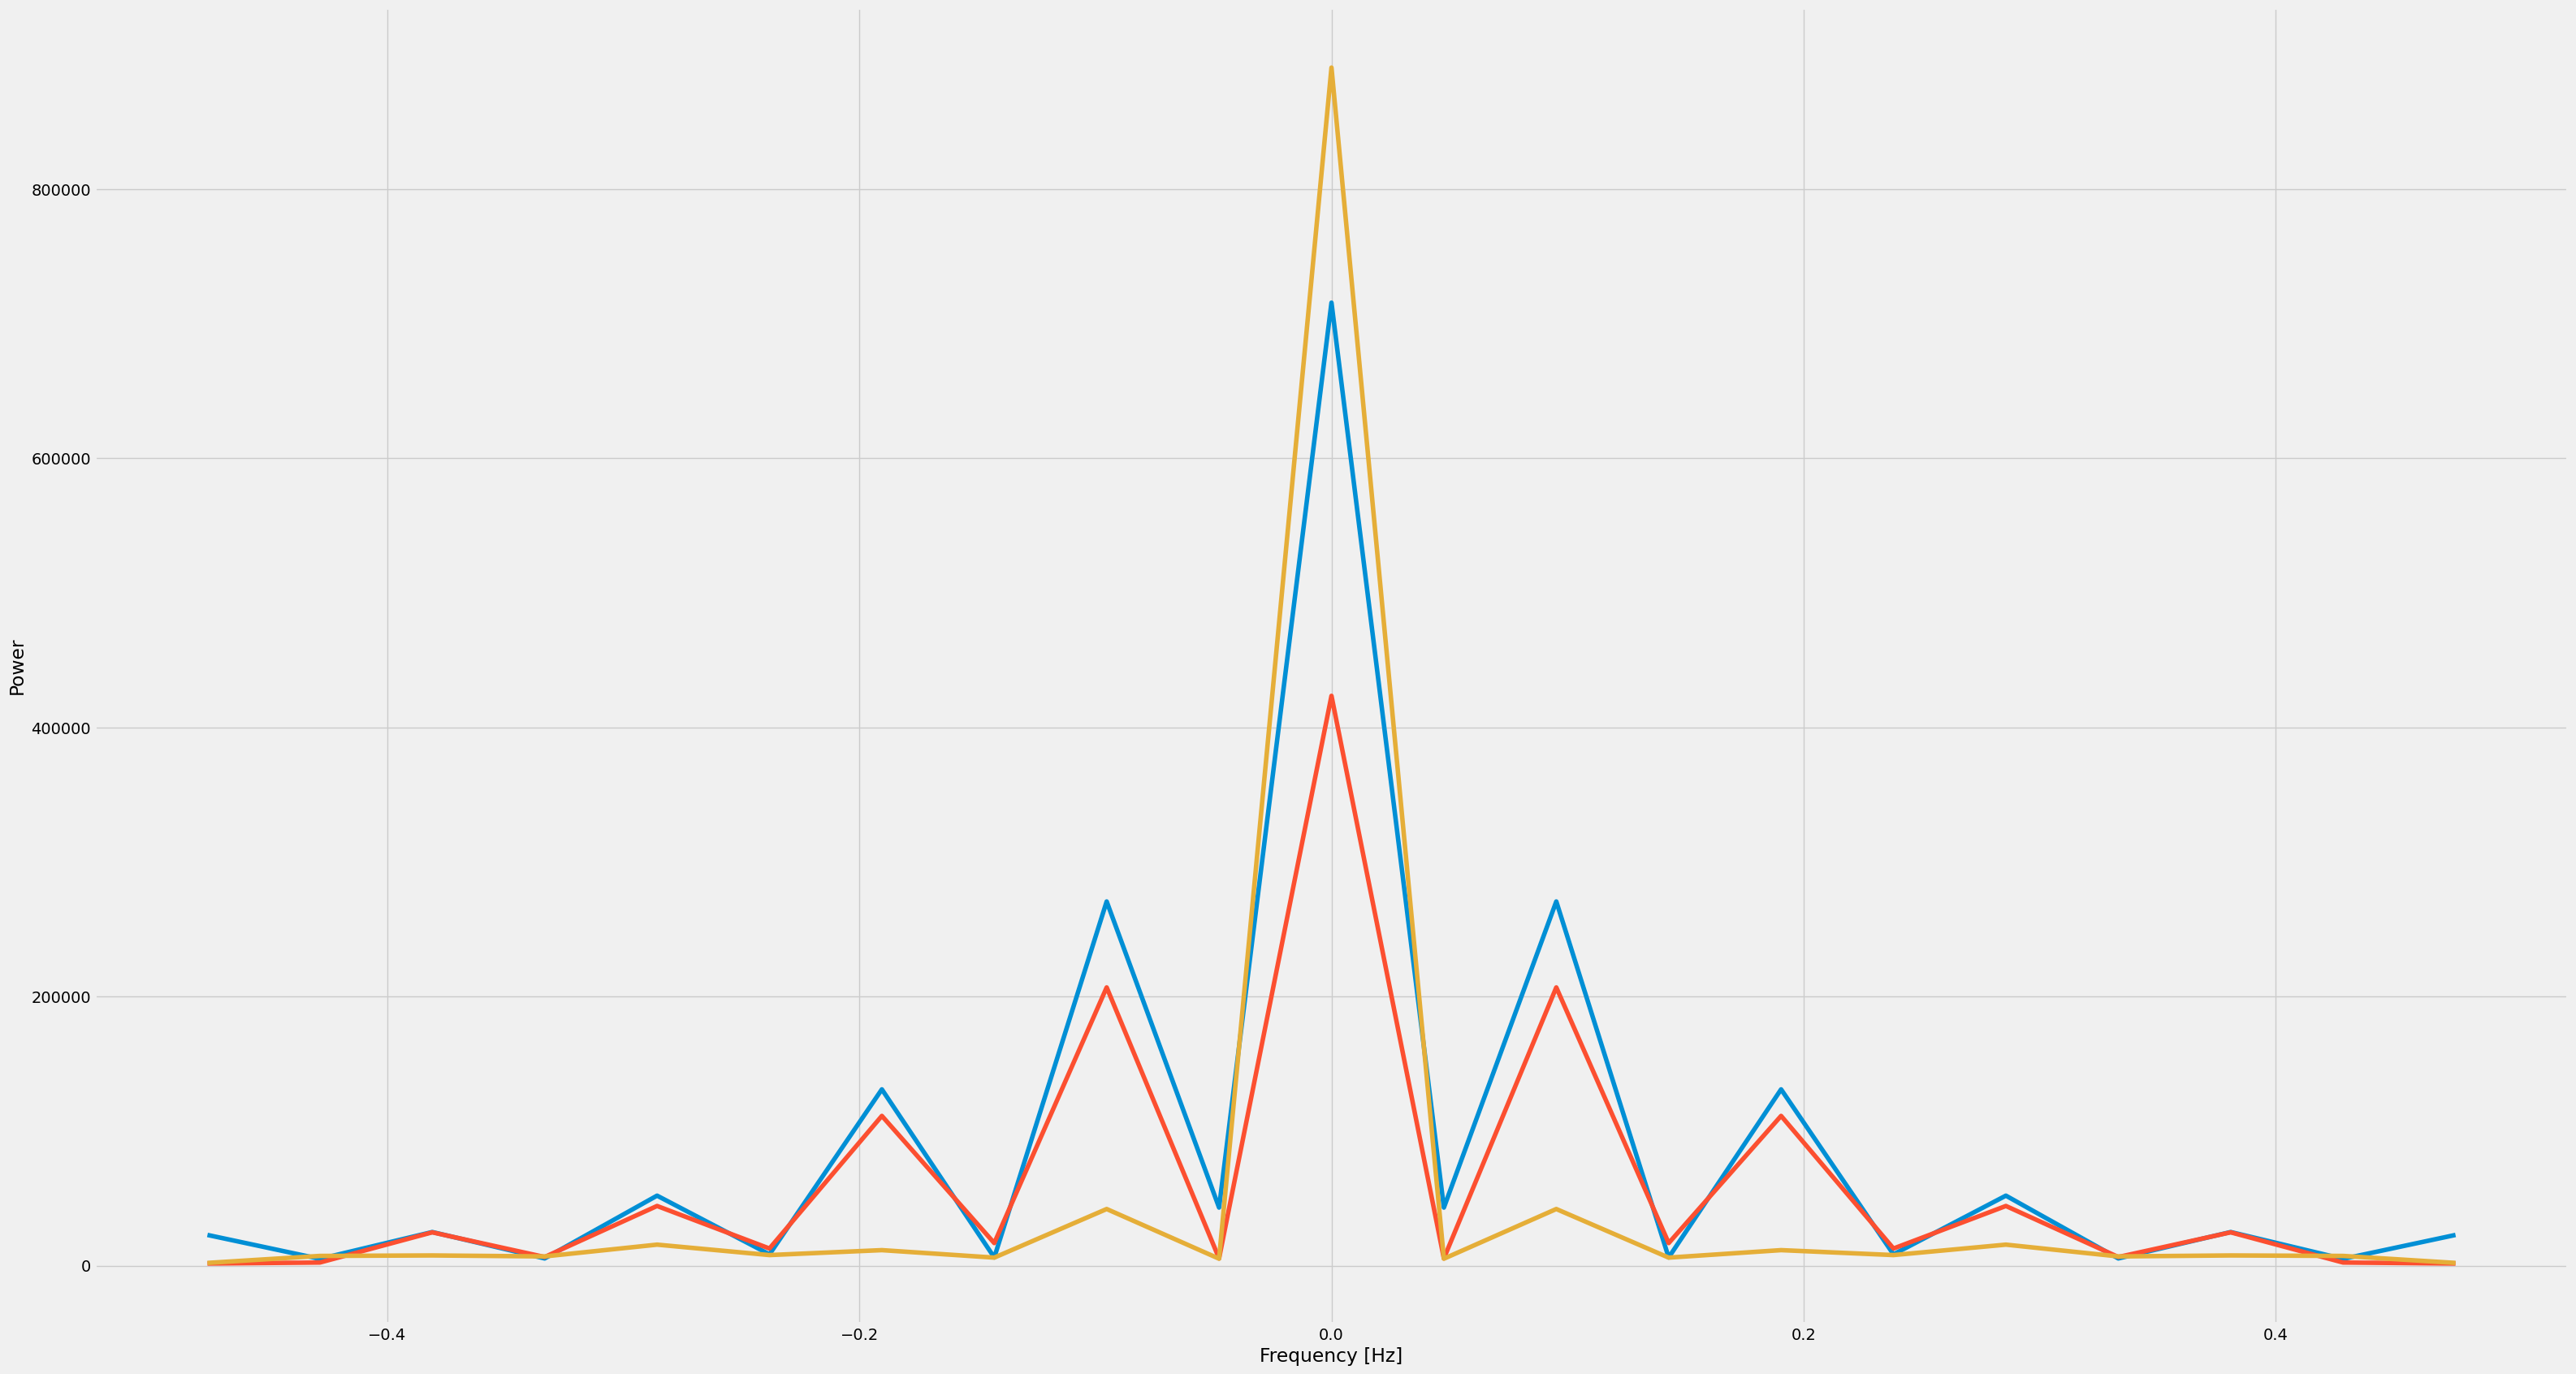

In [24]:
hares_fft, hares_fft_power = fftpack.fft(data['hare'].values), np.abs(fftpack.fft(data['hare'].values))
lynxes_fft, lynxes_fft_power =  fftpack.fft(data['lynx'].values), np.abs(fftpack.fft(data['lynx'].values))
carrots_fft, carrots_fft_power =  fftpack.fft(data['carrot'].values), np.abs(fftpack.fft(data['carrot'].values))
sample_freq = fftpack.fftfreq(data.shape[0])
plt.figure(figsize=(35,20))
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(hares_fft_power))
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(lynxes_fft_power))
plt.plot(fftpack.fftshift(sample_freq), fftpack.fftshift(carrots_fft_power))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')


In [25]:
def periodic_signal(data, name, fun_fft, color):
  power = np.abs(fun_fft)

  pos_mask = np.where(sample_freq > 0)
  freqs = sample_freq[pos_mask]

  # find the max of freqs array
  peak_freq = freqs[power[pos_mask].argmax()]
  print("Peak frequency " + name + ' : ', peak_freq)

  # filter (set to zero) all high frequency components that are larger than peak_freq
  fun_high_freq_fft = fun_fft.copy()
  fun_high_freq_fft[np.abs(sample_freq) > peak_freq] = 0

  # calculate the Inverse Fast Fourier Transform
  filtered_sig = fftpack.ifft(fun_high_freq_fft)

  # only take the real part
  real_filtered_signal = np.real(filtered_sig)

  # plot the result of the IFFT
  plt.plot(data['year'], data[name], alpha=0.5, label='Original signal ' + name, color=color)
  plt.plot(data['year'], real_filtered_signal, alpha=0.5, ls='--', marker='.',ms=25, label='Filtered signal ' + name, color=color)
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')
  plt.legend(loc='best')

Peak frequency hare :  0.09523809523809523
Peak frequency carrot :  0.09523809523809523
Peak frequency lynx :  0.09523809523809523


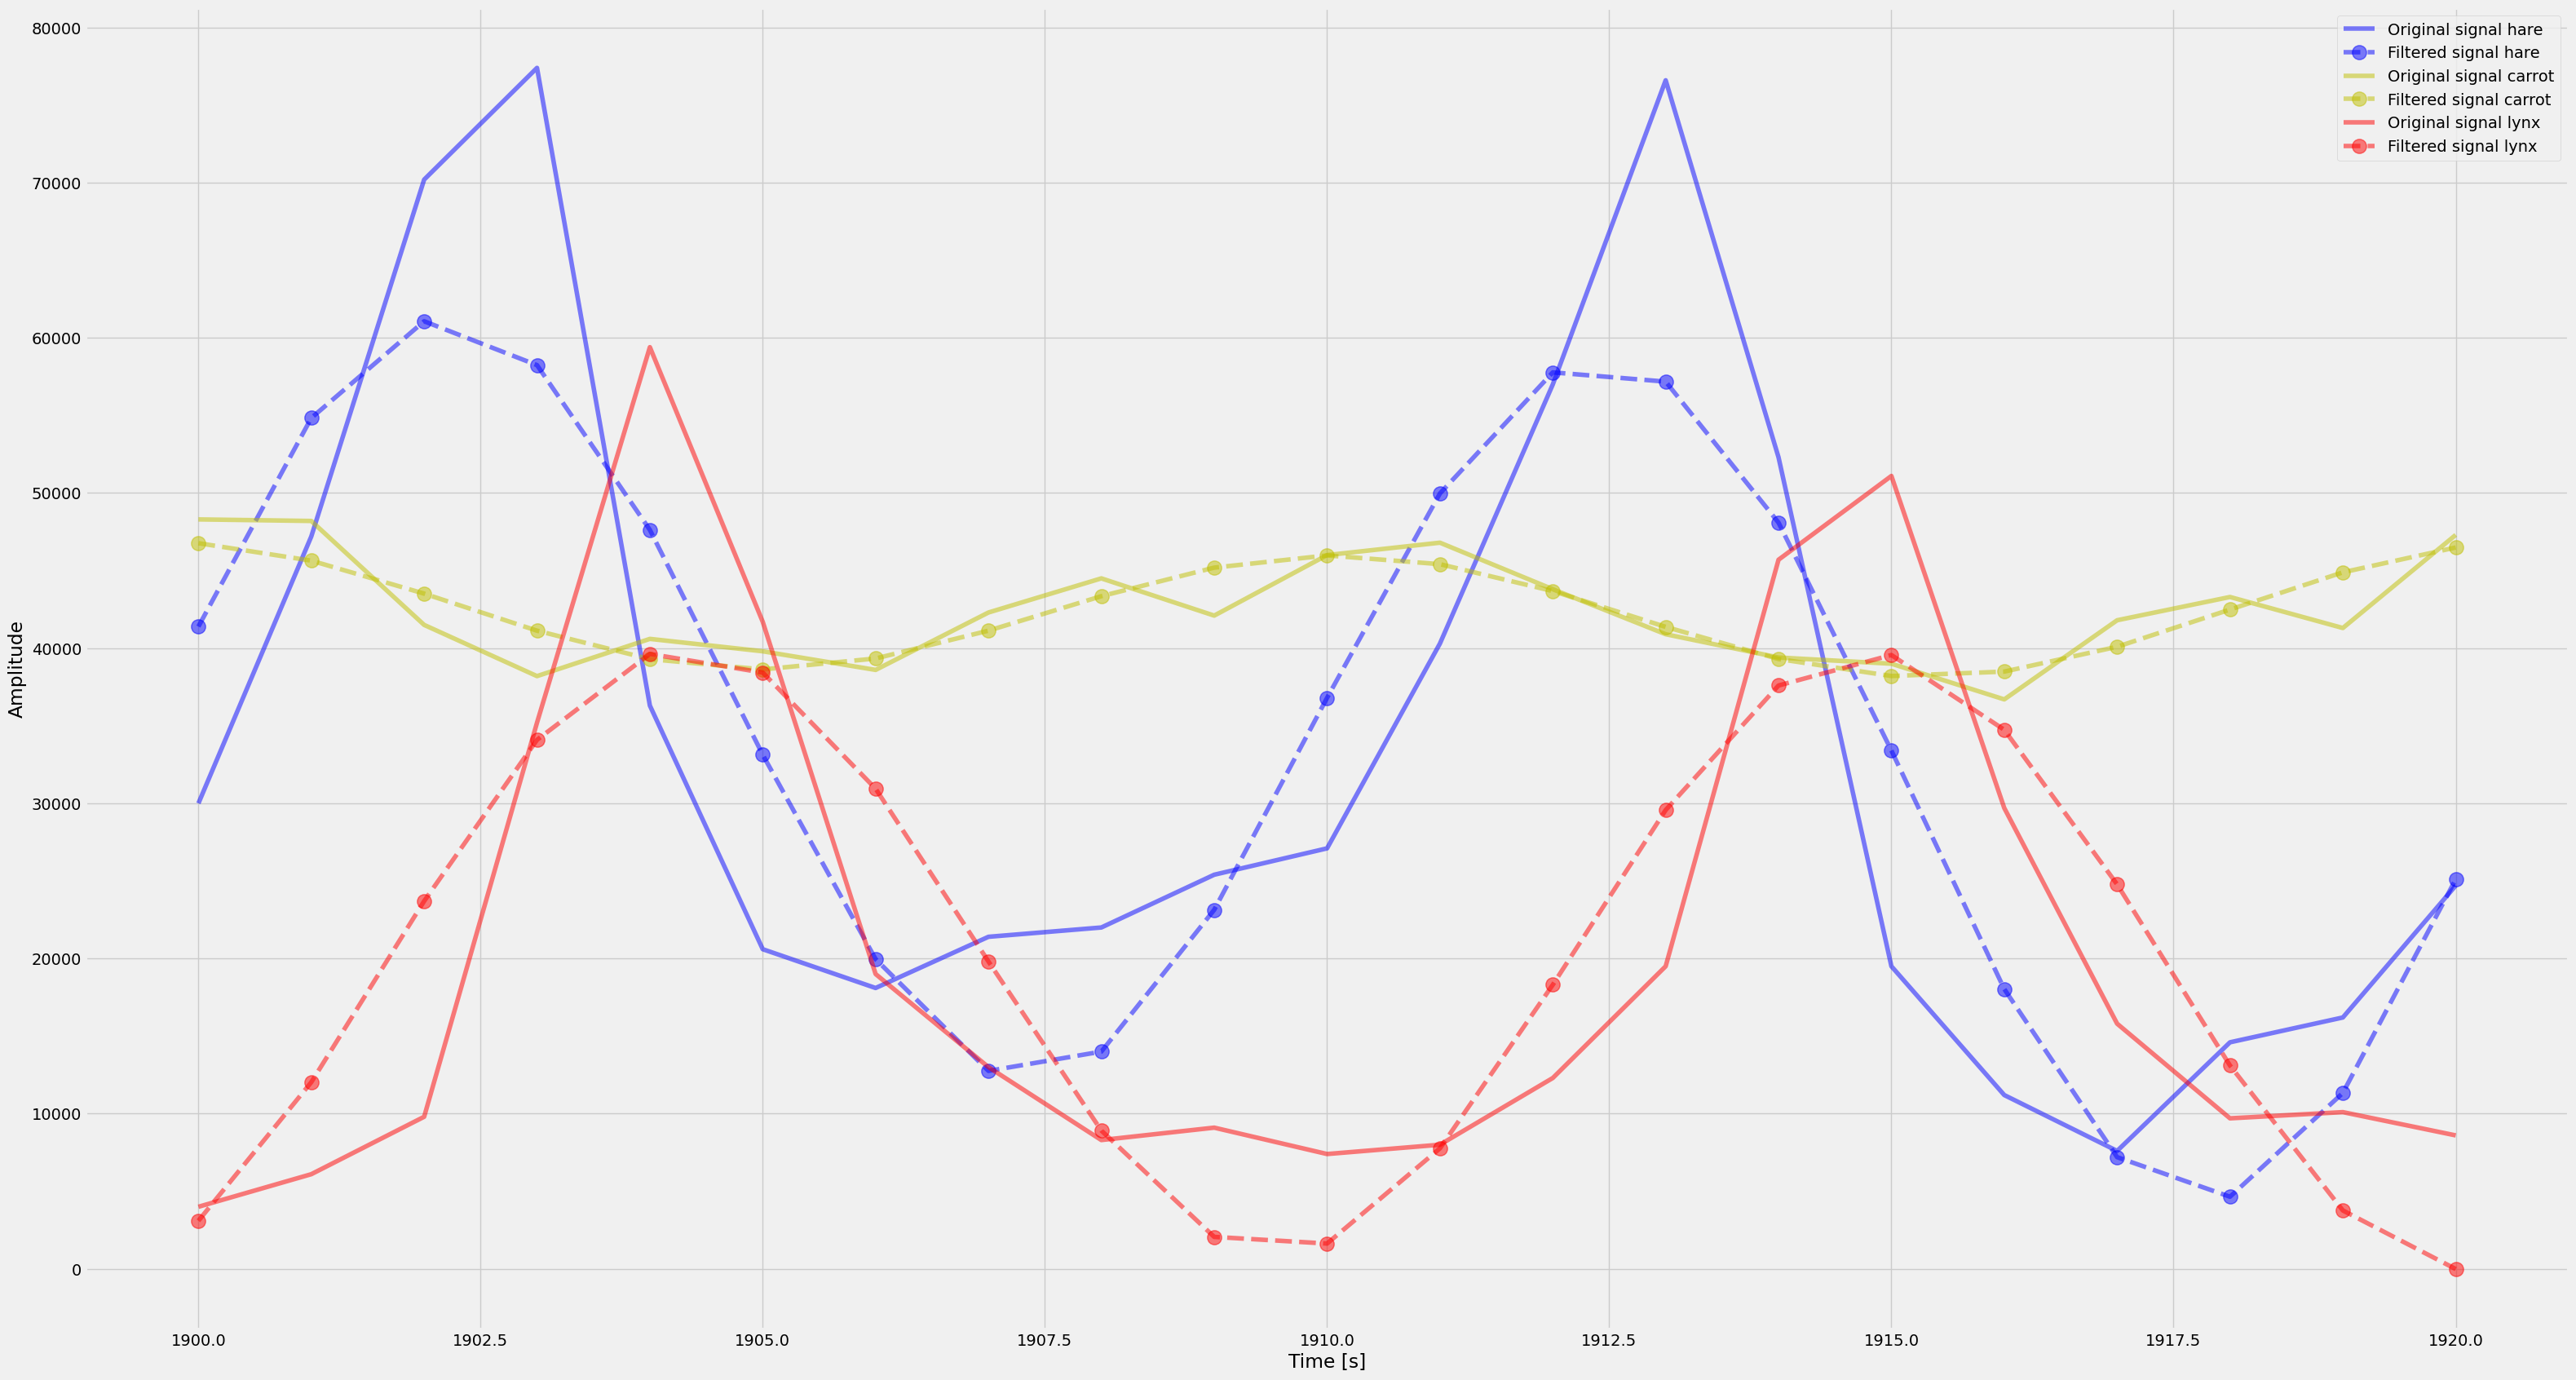

In [26]:
plt.figure(figsize=(35,20))
periodic_signal(data, 'hare', hares_fft, 'b')
periodic_signal(data, 'carrot', carrots_fft, 'y' )
periodic_signal(data, 'lynx', lynxes_fft, 'r')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

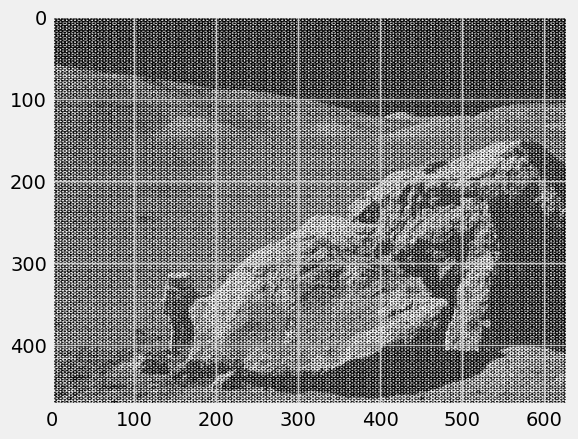

In [31]:
import matplotlib.pyplot as plt
img = plt.imread('./moonlanding.png')
plt.imshow(img)
plt.imshow(img, cmap='gray')

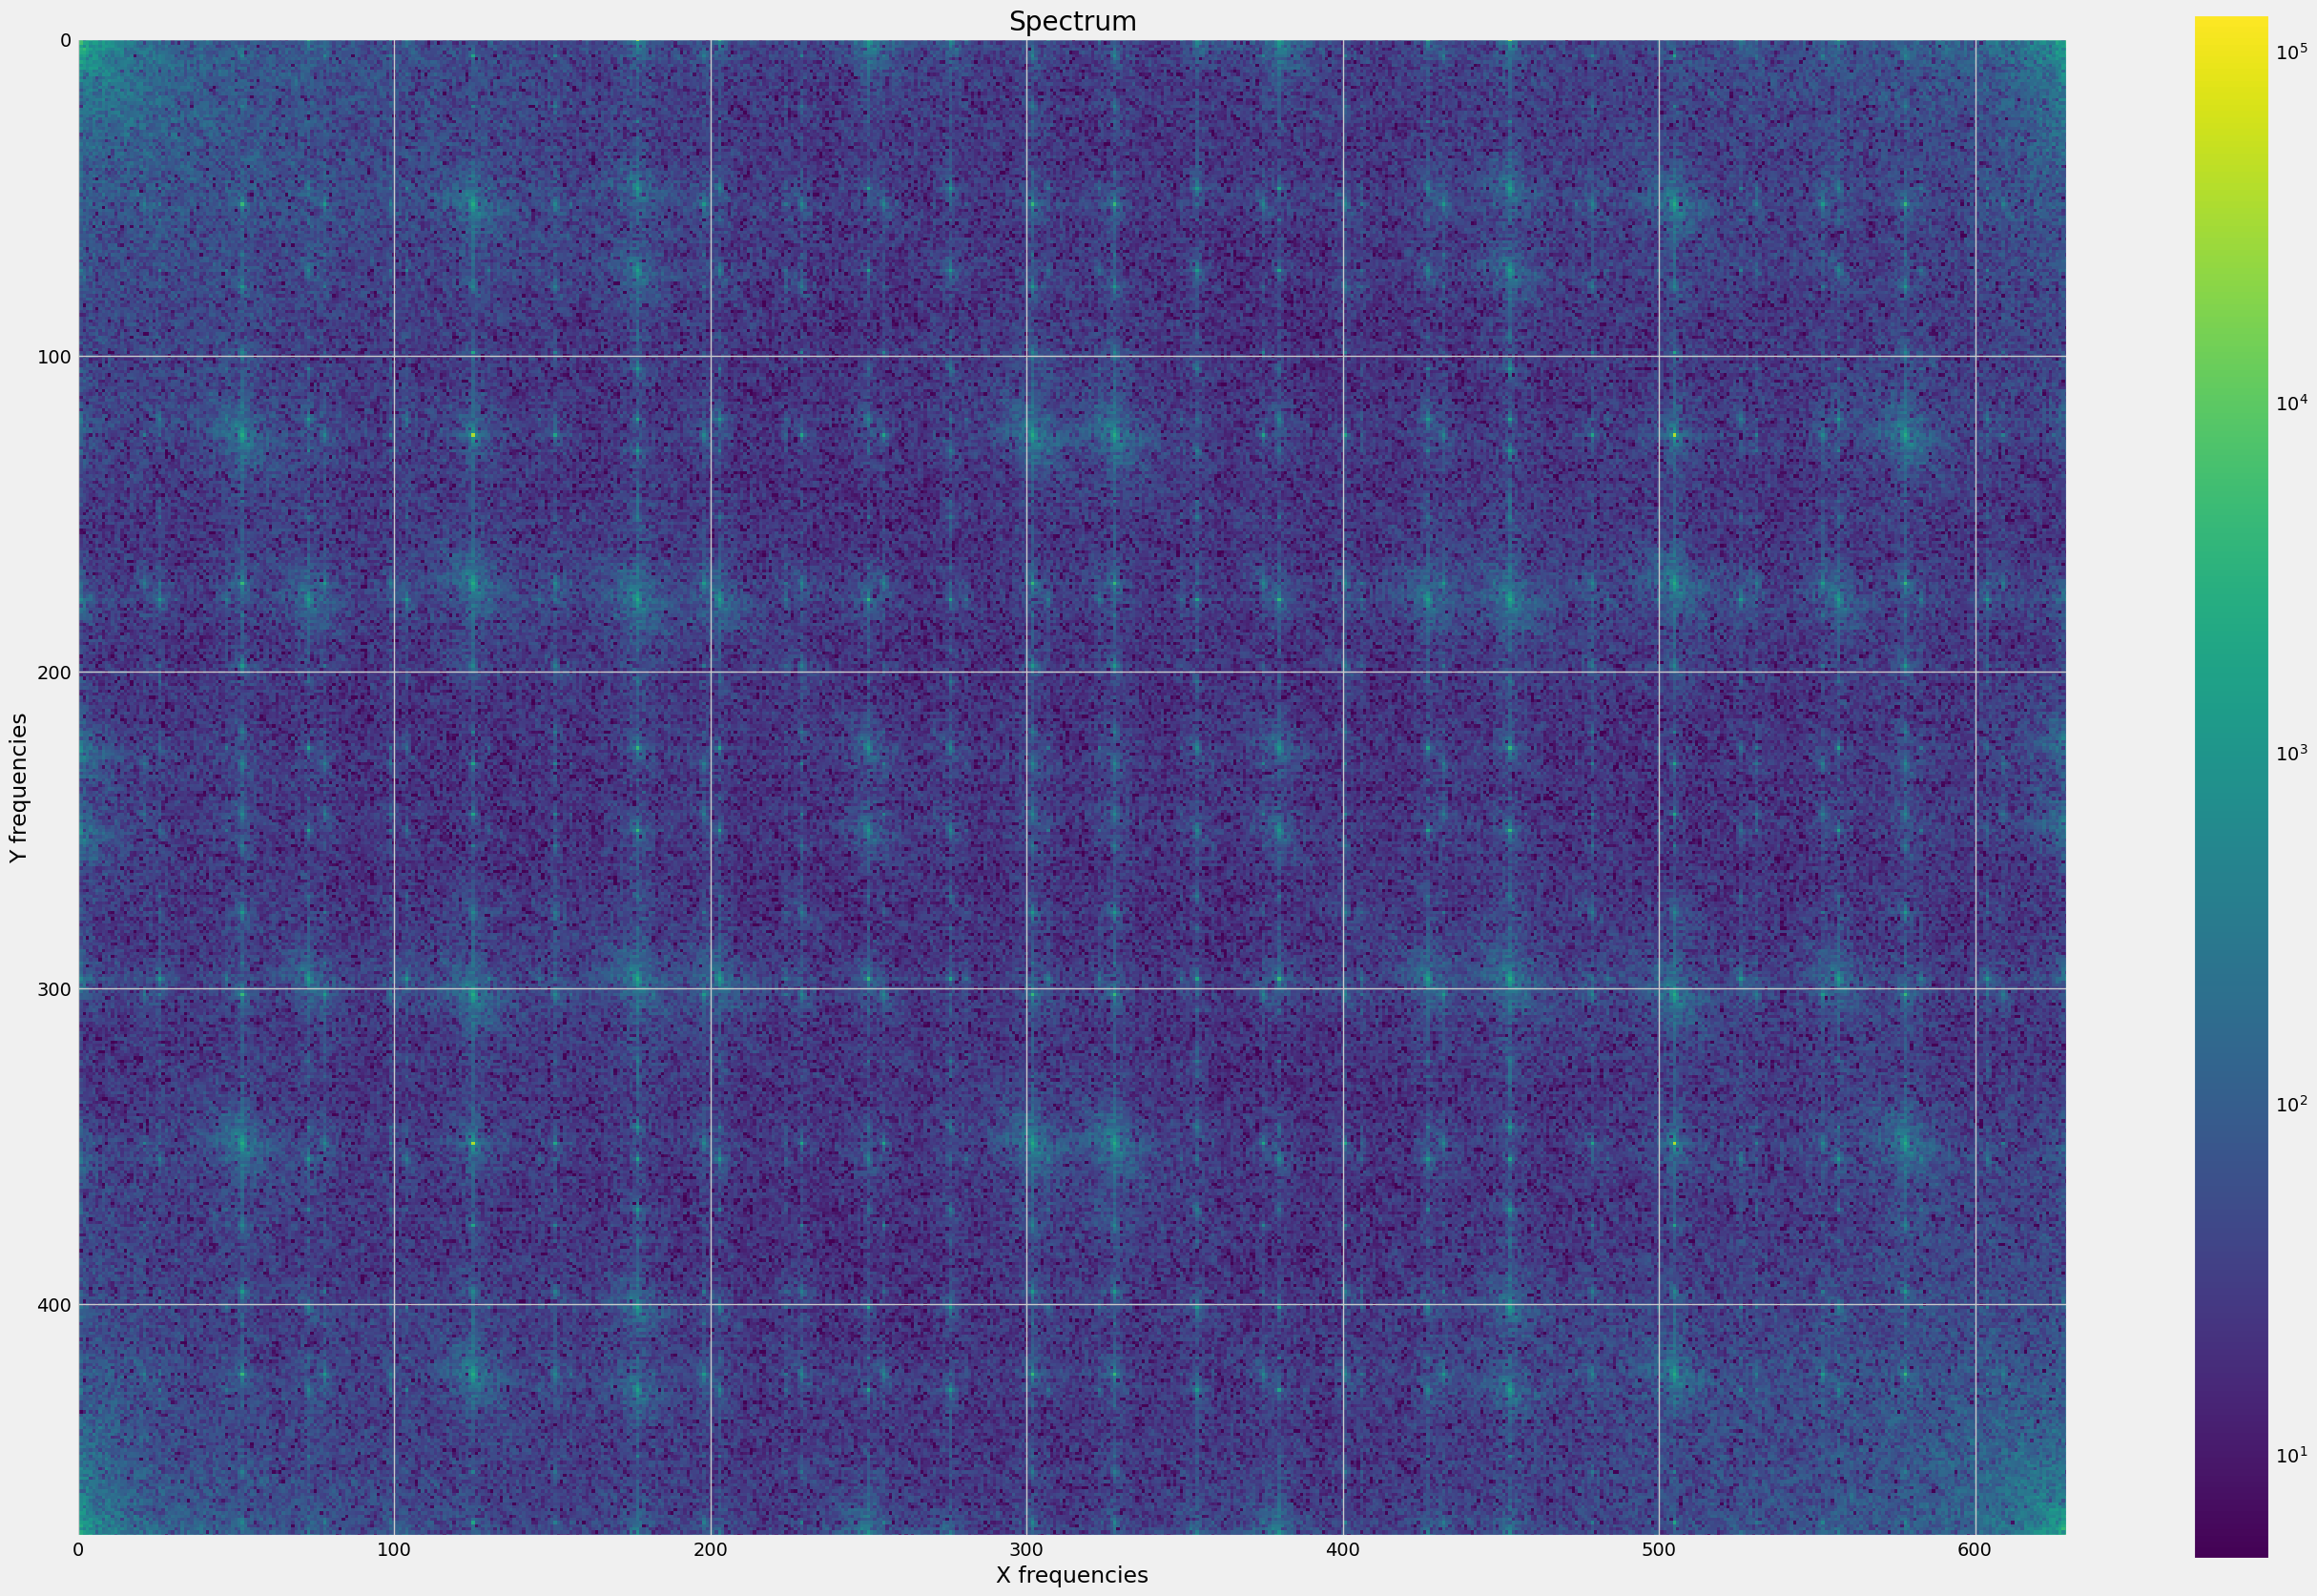

In [32]:
from matplotlib.colors import LogNorm

# 2D FFT of the image
image_fft = fftpack.fft2(img)

# Plot the spectrum (Fourier transform of) the image
plt.figure(figsize=(30,20))
sepc = plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.title('Spectrum')
plt.xlabel('X frequencies')
plt.ylabel('Y frequencies')
plt.colorbar(sepc)

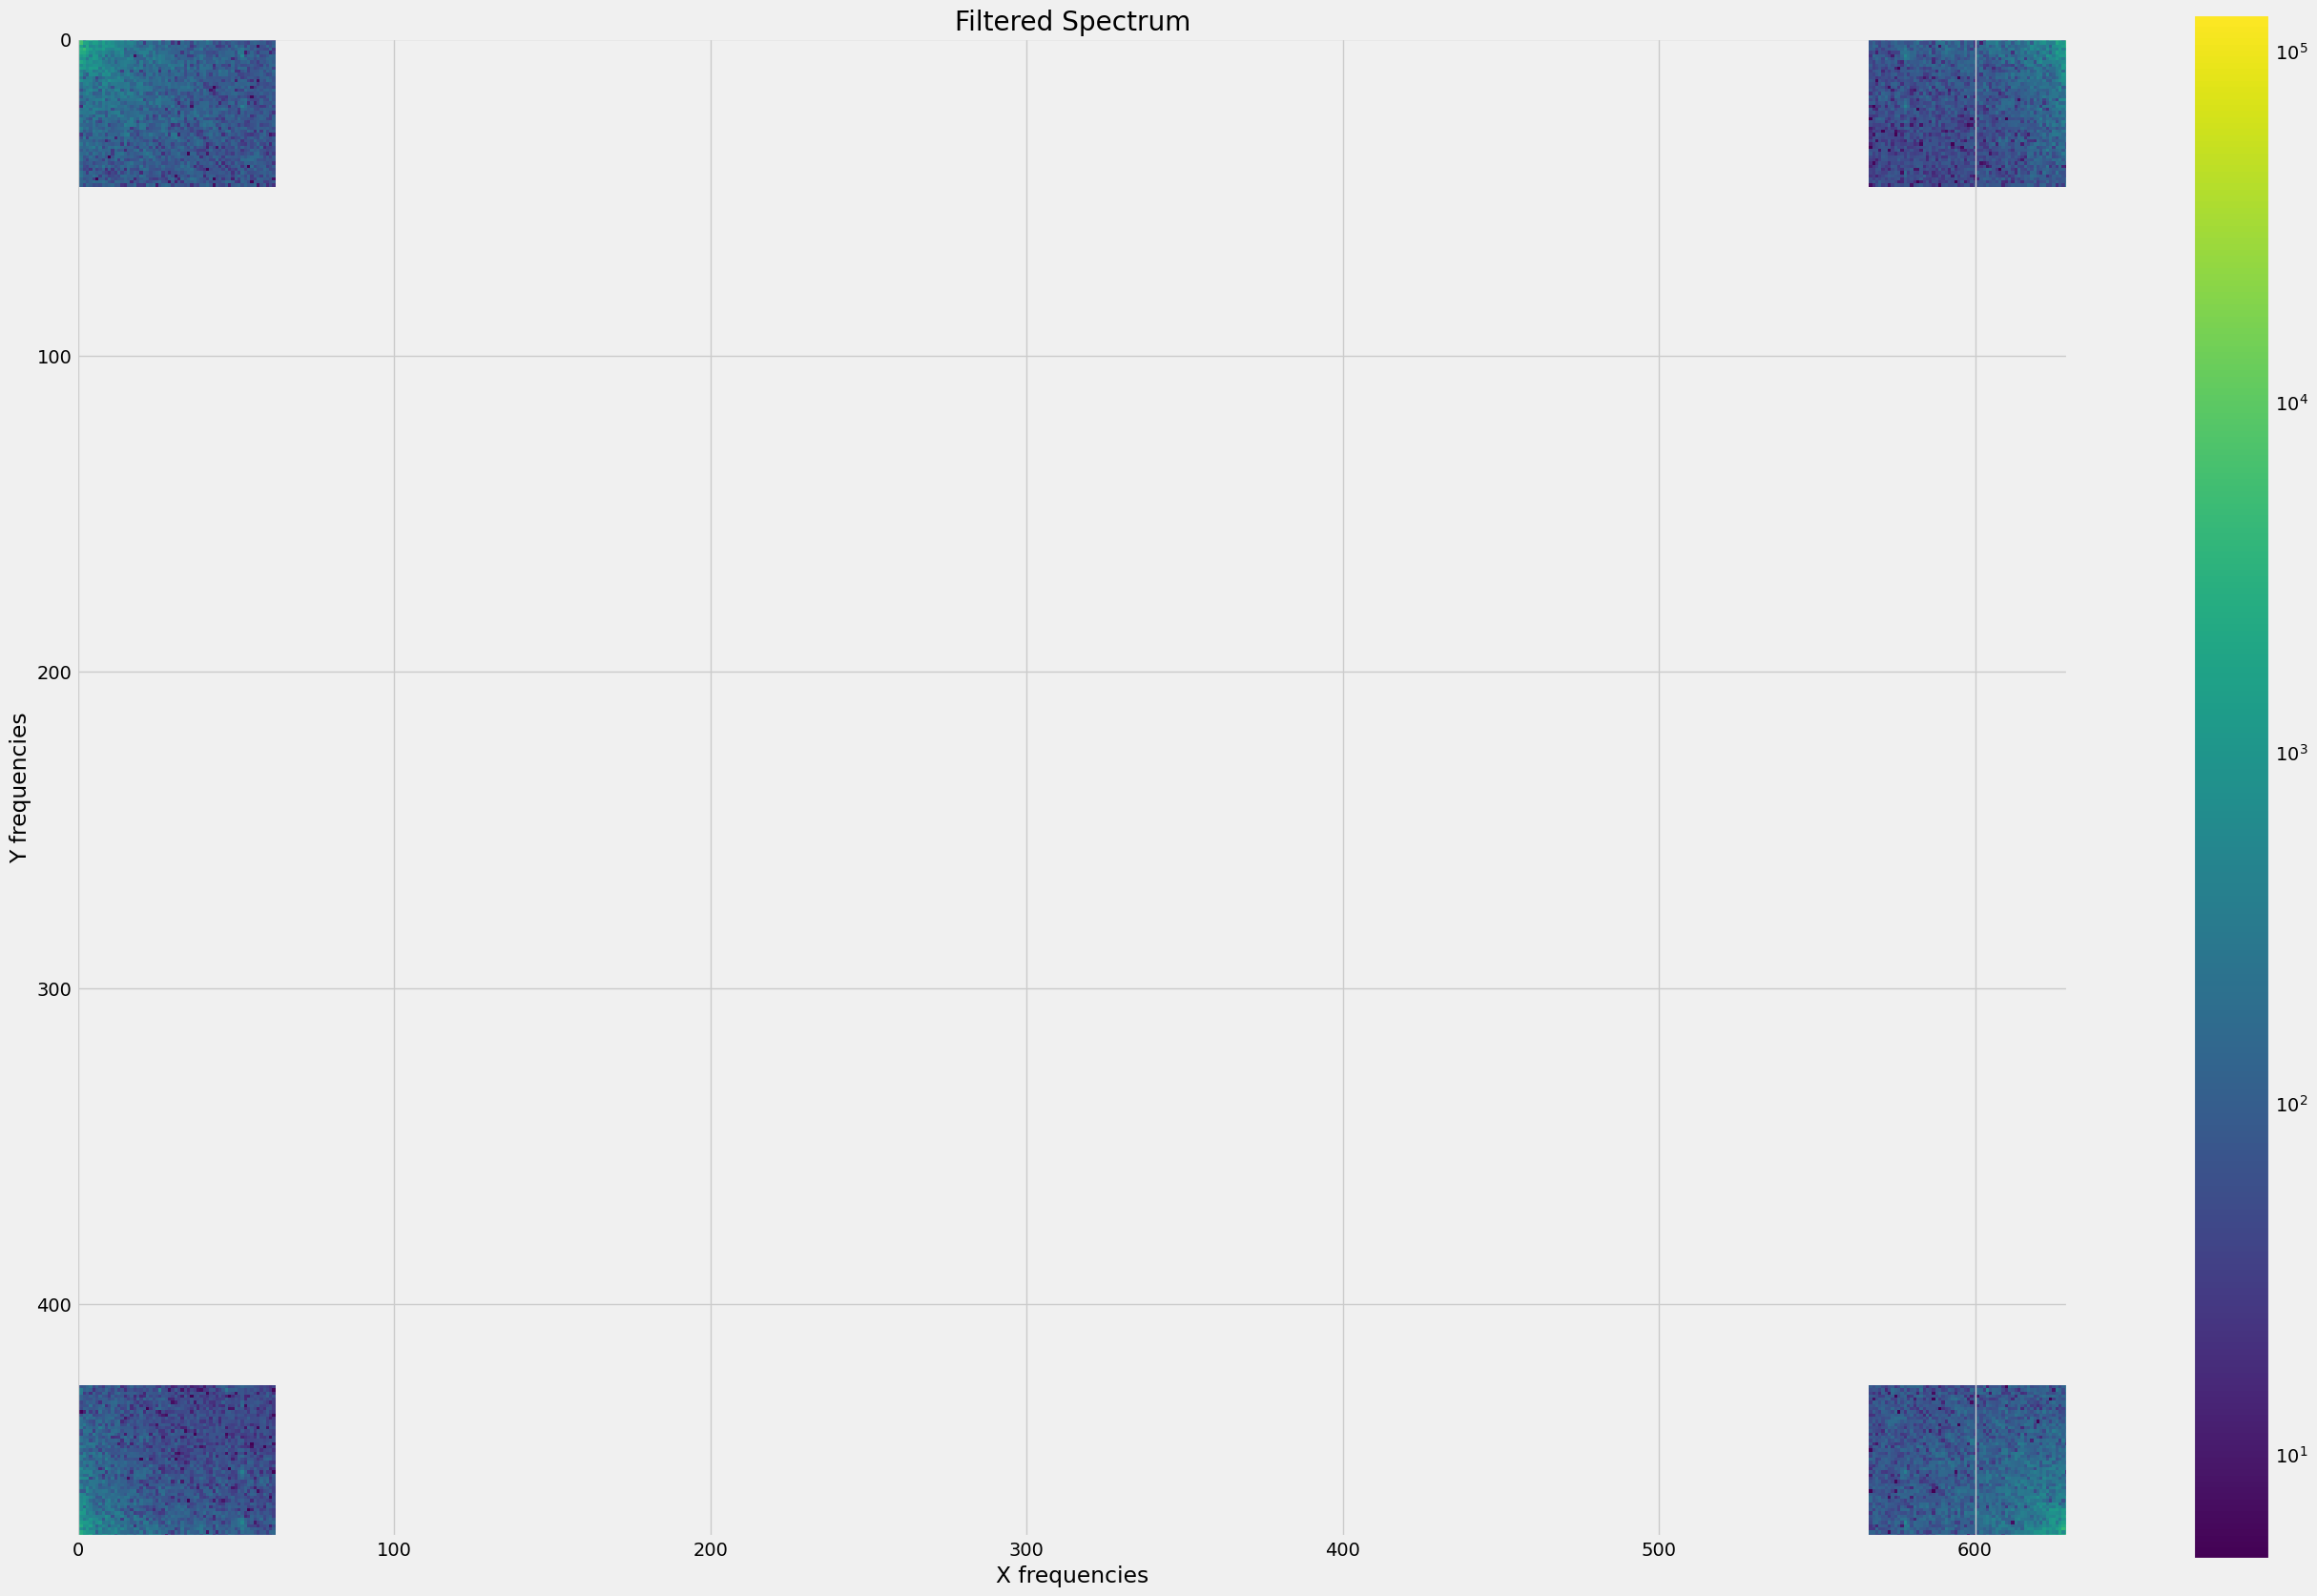

In [33]:
# Filter the spectre (set to 0 high freq components)
coeff = 0.1
x, y = image_fft.shape

image_fft[int(x*coeff):int(x*(1-coeff))] = 0
image_fft[:, int(y*coeff):int(y*(1-coeff))] = 0


plt.figure(figsize=(30,20))
sepc = plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.title('Filtered Spectrum')
plt.xlabel('X frequencies')
plt.ylabel('Y frequencies')
plt.colorbar(sepc)

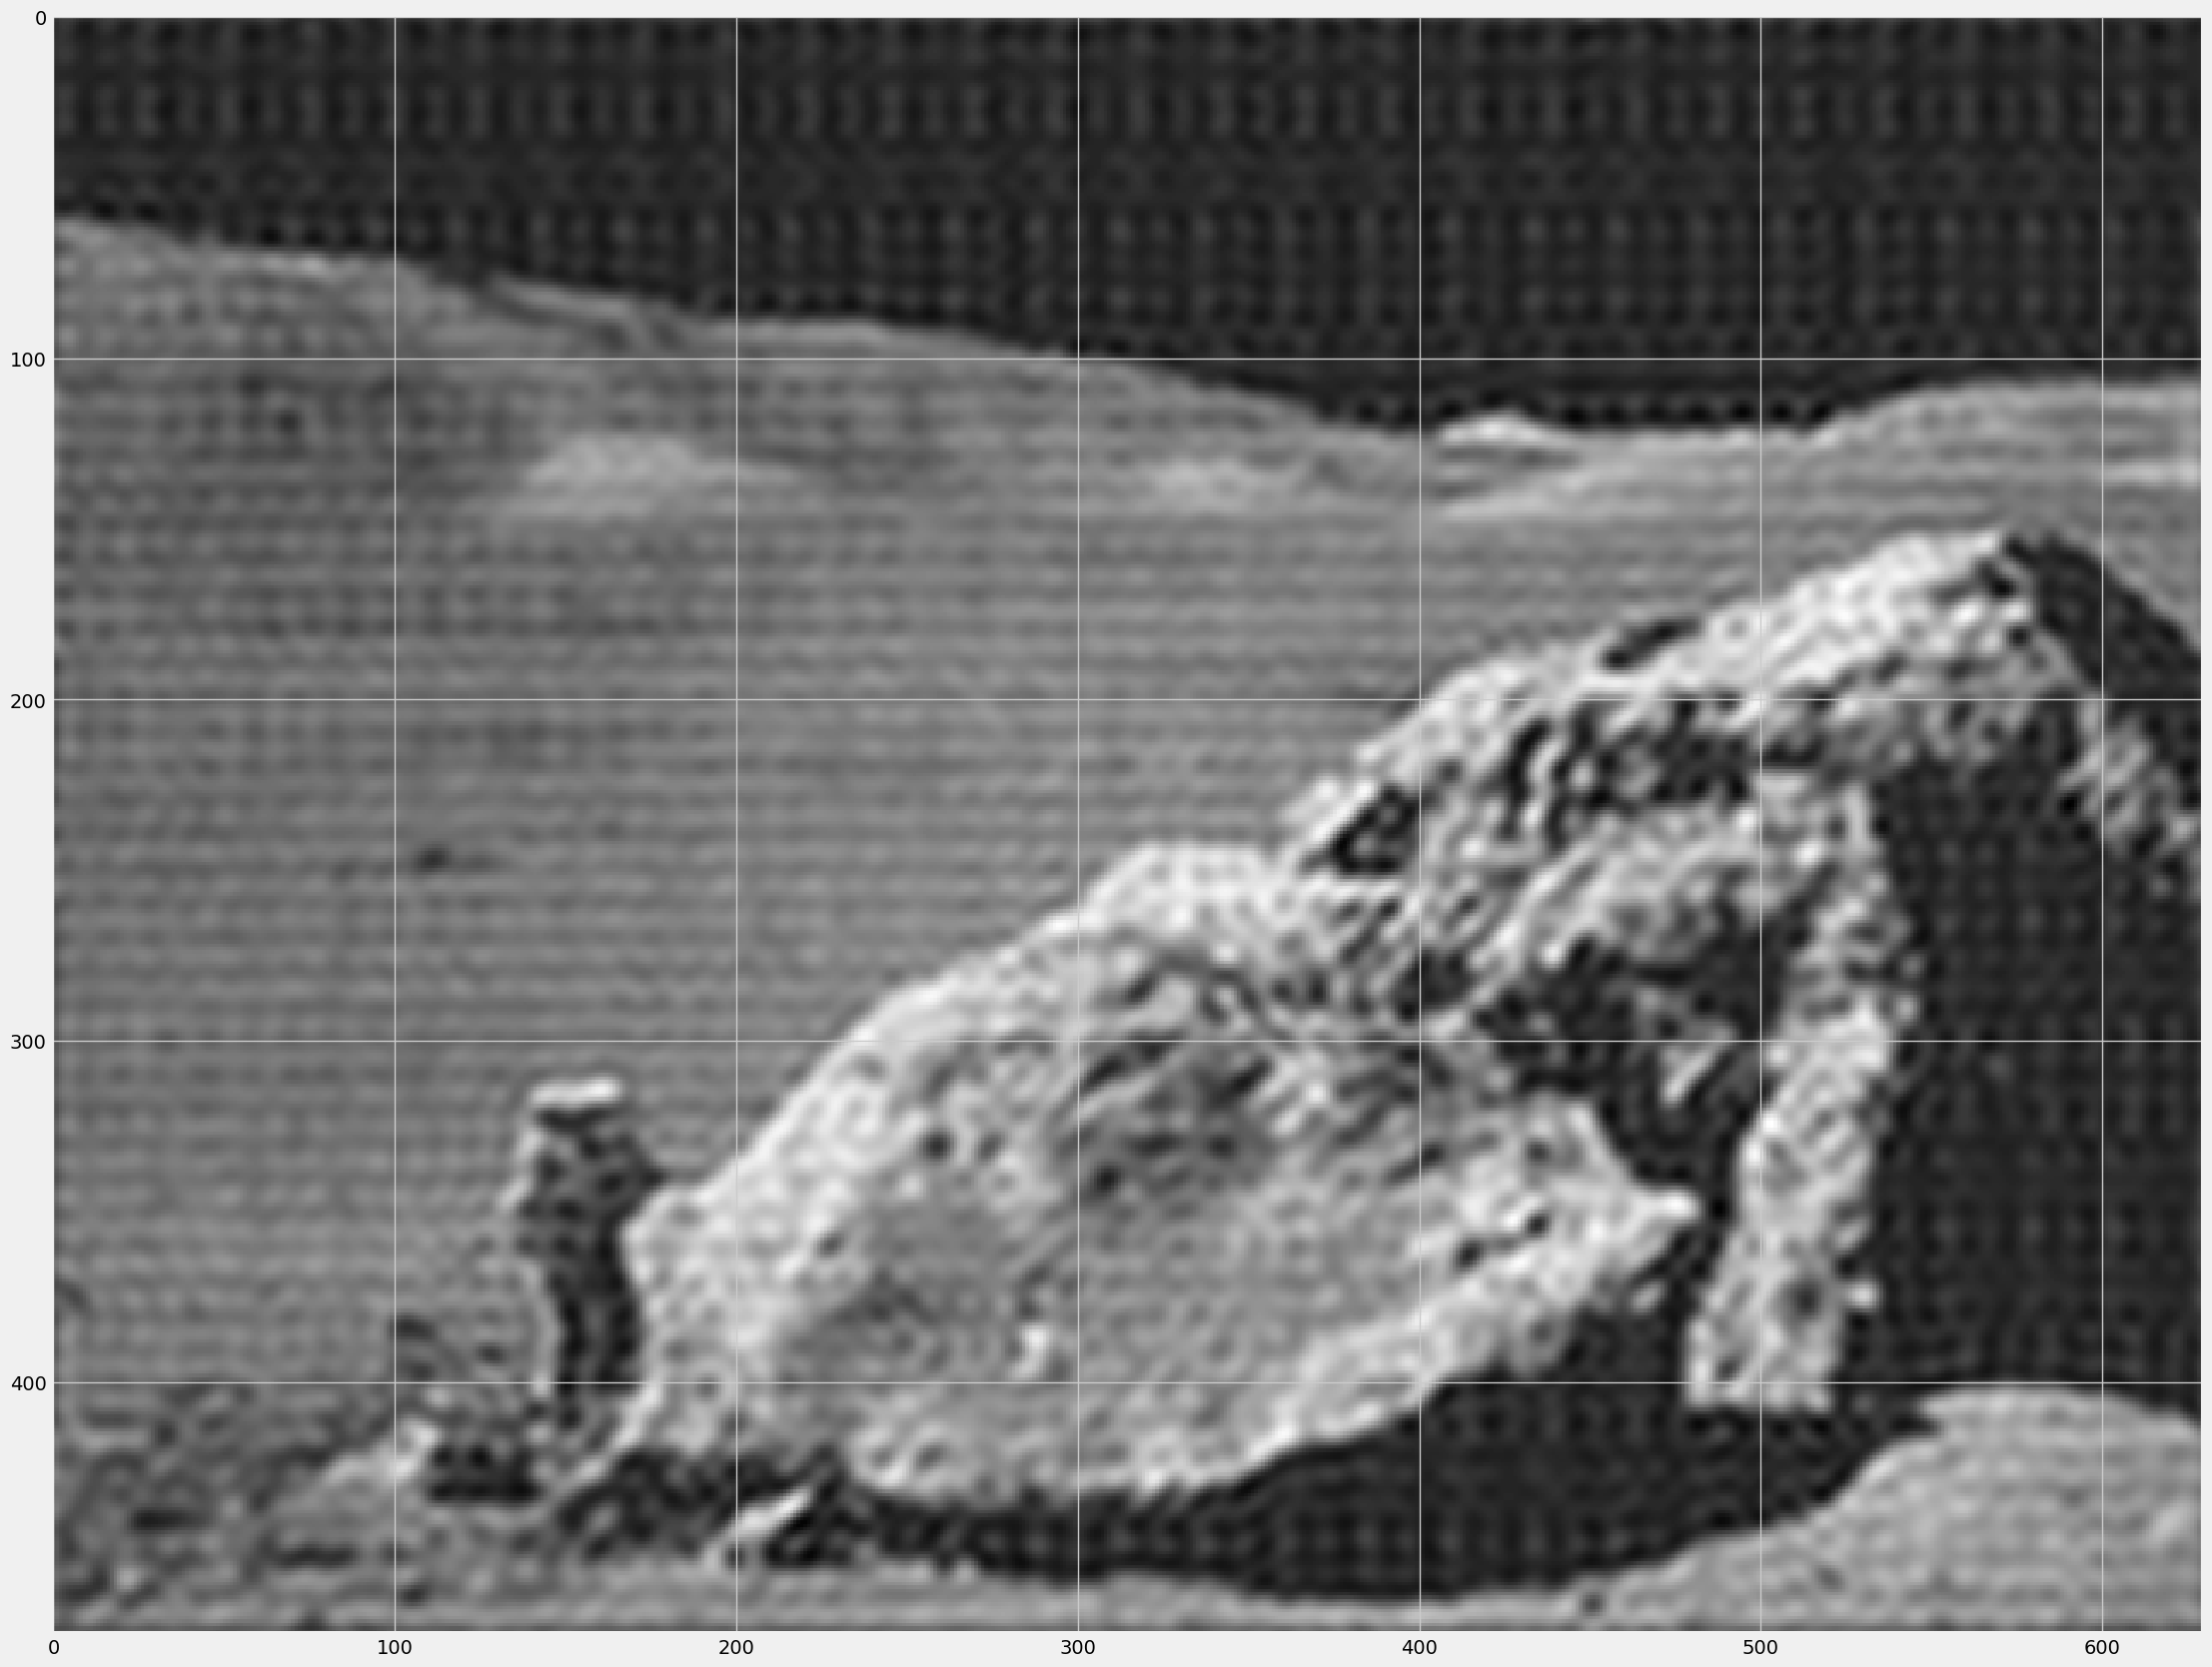

In [34]:
# Apply the inverse Fourier transform to plot the resulting image.e
filt_image = fftpack.ifft2(image_fft).real
plt.figure(figsize=(30,20))
plt.imshow(filt_image, cmap='gray')